# 부산 지하철 승하차 승객분석

- 부산시 공공데이터 data.busan.go.kr 
- 역별 시간대별 승하차 승객 분석

In [30]:
import pandas as pd

df = pd.read_csv('일별 역별 시간대별 승하차(2023년 4월).csv', encoding='cp949')
df

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2023-01-01,일,승차,6311,0,0,0,9,...,435,398,336,272,130,138,71,66,7,3
1,95,다대포해수욕장,2023-01-01,일,하차,5839,2,0,0,0,...,313,299,269,126,128,94,115,71,43,29
2,95,다대포해수욕장,2023-01-02,월,승차,4264,0,0,0,18,...,417,262,243,224,133,87,79,62,8,0
3,95,다대포해수욕장,2023-01-02,월,하차,3300,0,0,0,0,...,259,262,260,285,216,153,103,105,57,29
4,95,다대포해수욕장,2023-01-03,화,승차,4431,1,1,0,27,...,401,310,310,229,132,110,71,65,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26875,414,안 평,2023-04-28,금,하차,"2,282",0,0,0,0,...,161,147,194,185,143,88,74,94,66,38
26876,414,안 평,2023-04-29,토,승차,"1,647",0,0,0,6,...,90,121,126,103,49,28,16,13,4,0
26877,414,안 평,2023-04-29,토,하차,"1,485",0,0,0,0,...,89,111,131,97,80,64,50,69,49,25
26878,414,안 평,2023-04-30,일,승차,"1,783",0,0,0,5,...,160,198,166,108,68,48,28,11,18,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26880 entries, 0 to 26879
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   역번호      26880 non-null  int64 
 1   역명       26880 non-null  object
 2   년월일      26880 non-null  object
 3   요일       26880 non-null  object
 4   구분       26880 non-null  object
 5   합계       26880 non-null  object
 6   01시-02시  26880 non-null  int64 
 7   02시-03시  26880 non-null  int64 
 8   03시-04시  26880 non-null  int64 
 9   04시-05시  26880 non-null  int64 
 10  05시-06시  26880 non-null  int64 
 11  06시-07시  26880 non-null  int64 
 12  07시-08시  26880 non-null  object
 13  08시-09시  26880 non-null  object
 14  09시-10시  26880 non-null  object
 15  10시-11시  26880 non-null  object
 16  11시-12시  26880 non-null  object
 17  12시-13시  26880 non-null  object
 18  13시-14시  26880 non-null  object
 19  14시-15시  26880 non-null  object
 20  15시-16시  26880 non-null  object
 21  16시-17시  26880 non-null  object
 22

In [5]:
df.shape

(26880, 30)

In [6]:
df.isnull().sum()

역번호        0
역명         0
년월일        0
요일         0
구분         0
합계         0
01시-02시    0
02시-03시    0
03시-04시    0
04시-05시    0
05시-06시    0
06시-07시    0
07시-08시    0
08시-09시    0
09시-10시    0
10시-11시    0
11시-12시    0
12시-13시    0
13시-14시    0
14시-15시    0
15시-16시    0
16시-17시    0
17시-18시    0
18시-19시    0
19시-20시    0
20시-21시    0
21시-22시    0
22시-23시    0
23시-24시    0
24시-01시    0
dtype: int64

## 데이터 전처리

#### object -> int 형으로 형변환

합계와 인덱스 12~28번 컬럼 데이터의 ',' 제거하고 정수형으로 변환 

In [31]:
df['합계'] = df['합계'].str.replace(',','').astype(int)

In [32]:
for i in range(12, 29):
    df[df.columns[i]] = df.iloc[:,i].str.replace(',','').astype(int)


#### 역명

공백 제거

In [41]:
df['역명'].nunique()

112

In [39]:
df['역명'] = df['역명'].str.replace(' ','')

In [42]:
df['역명'].unique()

array(['다대포해수욕장', '다대포항', '낫개', '신장림', '장림', '동매', '신평', '하단', '당리', '사하',
       '괴정', '대티', '서대신', '동대신', '토성', '자갈치', '남포', '중앙', '부산역', '초량',
       '부산진', '좌천', '범일', '범내골', '1서면', '부전', '양정', '시청', '1연산', '교대',
       '1동래', '명륜', '온천장', '부산대', '장전', '구서', '두실', '남산', '범어사', '노포',
       '장산', '중동', '해운대', '동백', '벡스코', '센텀시티', '민락', '수영', '광안', '금련산',
       '남천', '경성대부경대', '대연', '못골', '지게골', '문현', '국제금융센터', '전포', '2서면',
       '부암', '가야', '동의대', '개금', '냉정', '주례', '감전', '사상', '덕포', '모덕', '모라',
       '구남', '구명', '2덕천', '수정', '화명', '율리', '동원', '금곡', '호포', '증산',
       '부산대양산', '남양산', '양산', '망미', '배산', '물만골', '3연산', '거제', '종합운동장',
       '사직', '미남', '만덕', '남산정', '숙등', '3덕천', '구포', '강서구청', '체육공원', '대저',
       '4동래', '수안', '낙민', '충렬사', '명장', '서동', '금사', '반여농산물', '석대', '영산대',
       '윗반송', '고촌', '안평'], dtype=object)

#### 호선 추가

In [43]:
def get_line(station_no):
    if station_no < 200:
        return '1호선'
    elif station_no < 300:
        return '2호선'
    elif station_no < 400:
        return '3호선'
    else:
        return '4호선'

In [45]:
df['호선'] = df['역번호'].apply(get_line)

In [56]:
cols = list(df.columns)

df = df[[cols[0]] + [cols[-1]] + cols[1:-1]]
# df[['역번호','호선','역명']]

#### 정규식

문자열의 패턴 

- 주민등록번호 
- 이메일주소
- 차량번호 
- IP 주소

1. 숫자추출: '/d+'
1. 이메일주소 : '\w+@\w+\.\w+'
1. 전화번호 : '\d{3}-\d{4}-\d{4}'
1. url : '(http|https)://\w+\.\w+(/\w+)*'
1. 한글문자추출 : '[가-힣]+'

In [60]:
df['역명'].str.replace('\d+', '', regex=True).unique()

df['역명'] = df['역명'].str.replace('\d+', '', regex=True)

In [61]:
df['역명'].unique()

array(['다대포해수욕장', '다대포항', '낫개', '신장림', '장림', '동매', '신평', '하단', '당리', '사하',
       '괴정', '대티', '서대신', '동대신', '토성', '자갈치', '남포', '중앙', '부산역', '초량',
       '부산진', '좌천', '범일', '범내골', '서면', '부전', '양정', '시청', '연산', '교대', '동래',
       '명륜', '온천장', '부산대', '장전', '구서', '두실', '남산', '범어사', '노포', '장산',
       '중동', '해운대', '동백', '벡스코', '센텀시티', '민락', '수영', '광안', '금련산', '남천',
       '경성대부경대', '대연', '못골', '지게골', '문현', '국제금융센터', '전포', '부암', '가야',
       '동의대', '개금', '냉정', '주례', '감전', '사상', '덕포', '모덕', '모라', '구남', '구명',
       '덕천', '수정', '화명', '율리', '동원', '금곡', '호포', '증산', '부산대양산', '남양산',
       '양산', '망미', '배산', '물만골', '거제', '종합운동장', '사직', '미남', '만덕', '남산정',
       '숙등', '구포', '강서구청', '체육공원', '대저', '수안', '낙민', '충렬사', '명장', '서동',
       '금사', '반여농산물', '석대', '영산대', '윗반송', '고촌', '안평'], dtype=object)

# 사람들이 많이 모이는 시간, 역 찾기



### 승차 승객이 많은 역 찾기

In [64]:
get_on = df[df['구분'] =='승차']

In [67]:
#승차를 가장 많이 하는 역 top 10
get_on = get_on.groupby(['호선','역명']).sum(True)

In [71]:
top10_geton = get_on['합계'].sort_values(ascending=False).head(10)

In [72]:
top10_geton

호선   역명  
1호선  서면      3879680
2호선  서면      2739738
1호선  부산역     2552365
2호선  사상      2465903
1호선  하단      2190339
2호선  센텀시티    2162703
1호선  연산      2040140
     남포      2013746
     자갈치     2005069
     동래      1925129
Name: 합계, dtype: int32

In [73]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

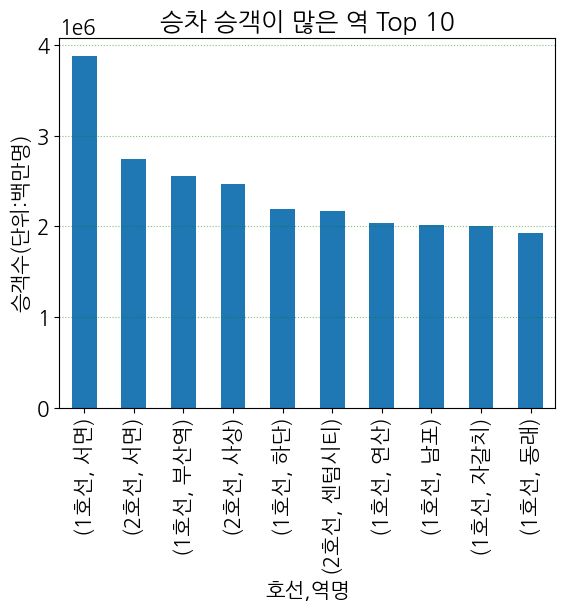

In [84]:
import matplotlib.pyplot as plt

top10_geton.plot(kind='bar', y='합계')

plt.ylabel('승객수(단위:백만명)')
plt.title('승차 승객이 많은 역 Top 10')
plt.grid(axis='y', ls = ':', color = 'g', alpha=0.5)
plt.show()

## 시간대별 승차를 많이 한 역 찾기

In [92]:
geton_bytime = get_on.drop(['역번호','합계'], axis=1)

In [96]:
styledf_all = geton_bytime.style.background_gradient()
styledf_line1 = geton_bytime.loc['1호선'].style.background_gradient()

In [97]:
styledf_all.to_excel('styled_data.xlsx')

In [98]:
styledf_line1.to_excel('styled_data1.xlsx')

In [117]:
max_bytime = geton_bytime.idxmax()

data = []
for index, value in max_bytime.items():
#     print(index, value, geton_bytime.loc[value, index])
    data.append([index, value[0], value[1],geton_bytime.loc[value, index]])
#     geton_bytime.loc[('2호선', '서면'), '01시-02시']
    

#시간대 / 호선 / 역명 / 승차승객수 
pd.DataFrame(data, columns=['시간대', '호선','역명', '승차승객수'])

,시간대,호선,역명,승차승객수
0,01시-02시,2호선,서면,181
1,02시-03시,2호선,남양산,67
2,03시-04시,2호선,남천,234
3,04시-05시,1호선,신평,3767
4,05시-06시,1호선,서면,36863
5,06시-07시,1호선,연산,50564
6,07시-08시,1호선,하단,133807
7,08시-09시,2호선,수영,213446
8,09시-10시,2호선,사상,148382
9,10시-11시,1호선,부산역,158128


## 하차 승객 분석

In [122]:
get_off = df[df['구분'] == '하차'].groupby(['호선','역명']).sum(True)

In [123]:
getoff_bytime = get_off.drop(['역번호','합계'], axis = 1)

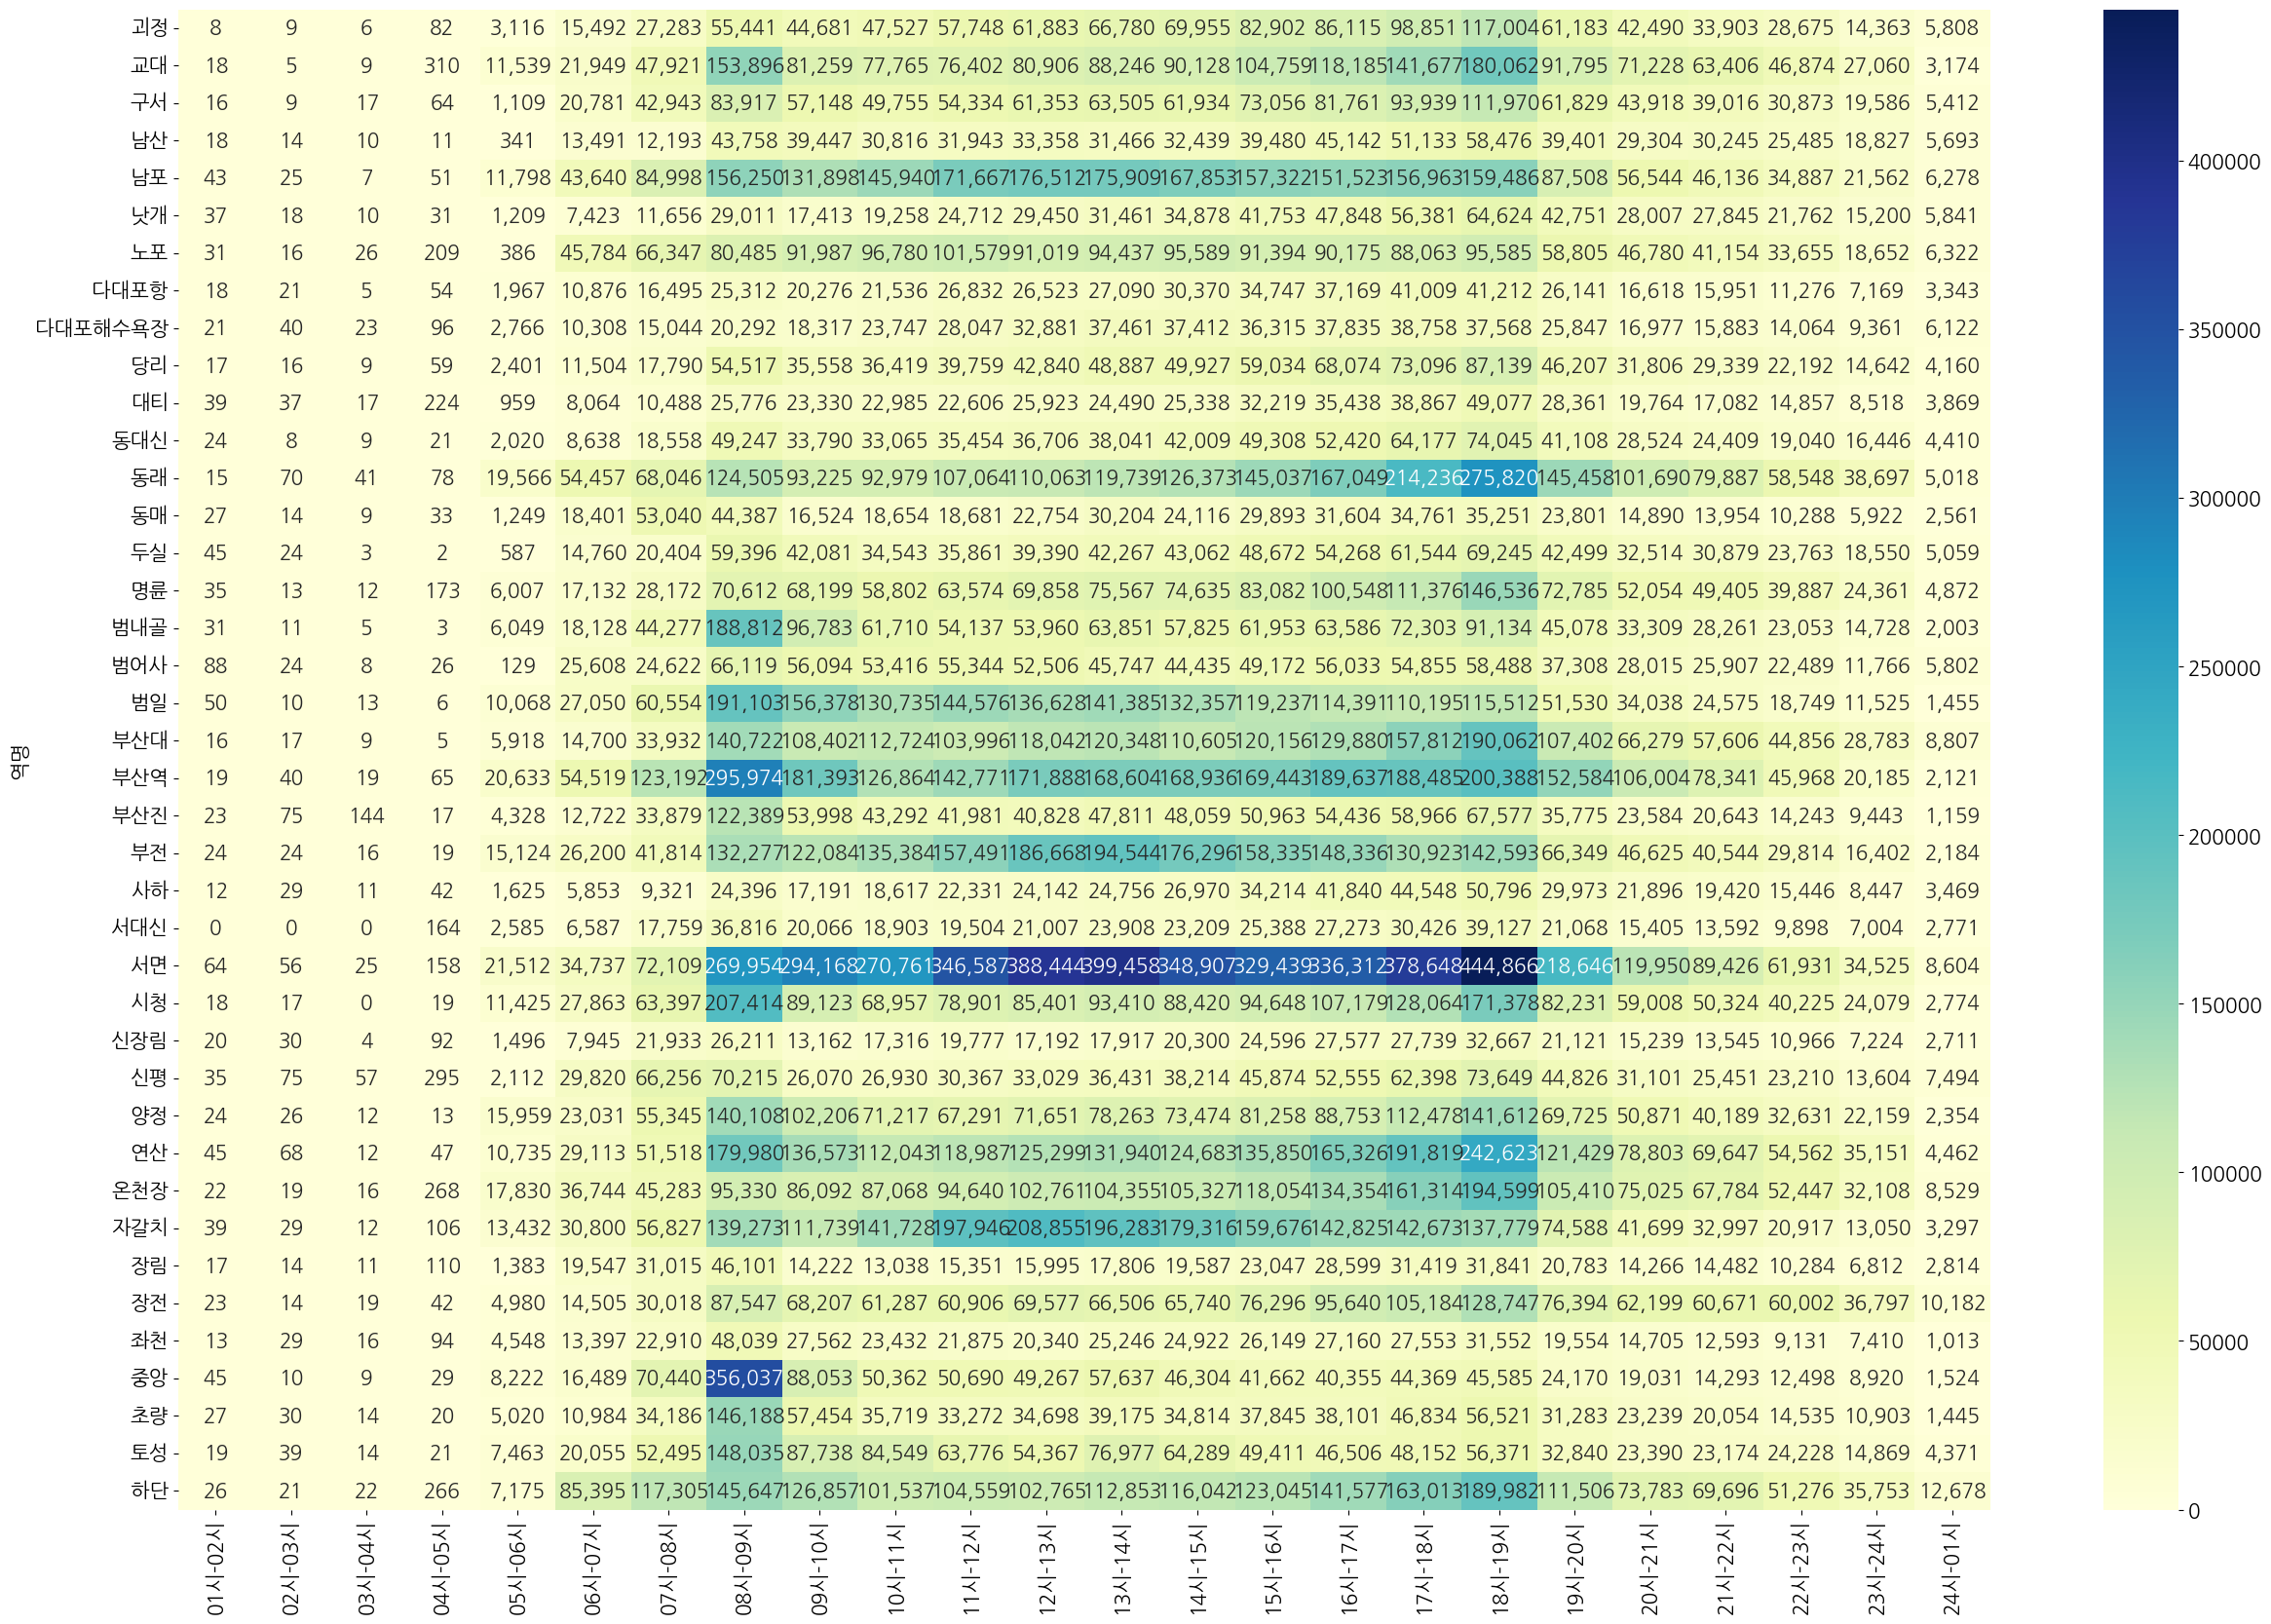

In [130]:
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(getoff_bytime.loc['1호선'], cmap = 'YlGnBu', annot = True, fmt=',')
plt.show()

In [132]:
top10_getoff = get_off['합계'].sort_values(ascending=False).head(10)

In [136]:
totaldf = pd.merge(top10_geton, top10_getoff, on=['호선','역명'])
totaldf.columns = ['승차','하차']
totaldf

승차       하차
호선  역명                    
1호선 서면    3879680  4469287
2호선 서면    2739738  2882601
1호선 부산역   2552365  2608073
2호선 사상    2465903  2507608
1호선 하단    2190339  1992779
2호선 센텀시티  2162703  2127076
1호선 연산    2040140  2120715
    남포    2013746  2144800
    자갈치   2005069  2045886
    동래    1925129  2147661

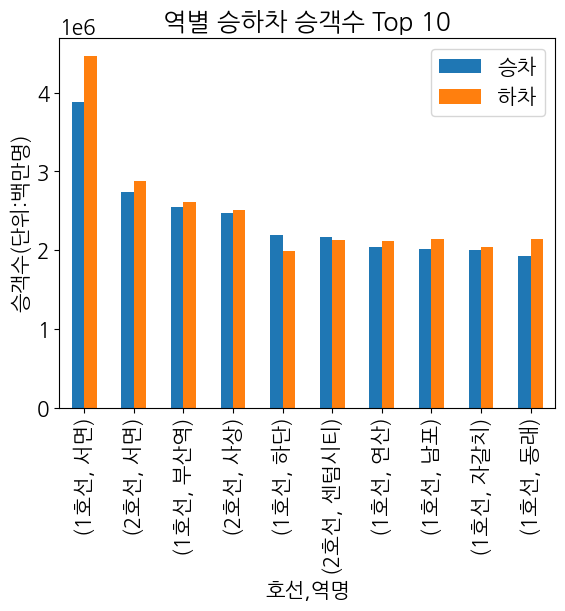

In [140]:
totaldf.plot(kind='bar')
plt.title('역별 승하차 승객수 Top 10')
plt.ylabel('승객수(단위:백만명)')
plt.show()

## 요일별 승하차 승객수


In [146]:
df.groupby('요일')['합계'].mean(True)

week = ['월','화','수','목','금','토','일']

byweek = df.groupby('요일')['합계'].mean(True).loc[week]
byweek

요일
월    7730.420168
화    7795.171481
수    7775.731880
목    8134.519433
금    8438.043592
토    6581.676733
일    4801.948413
Name: 합계, dtype: float64

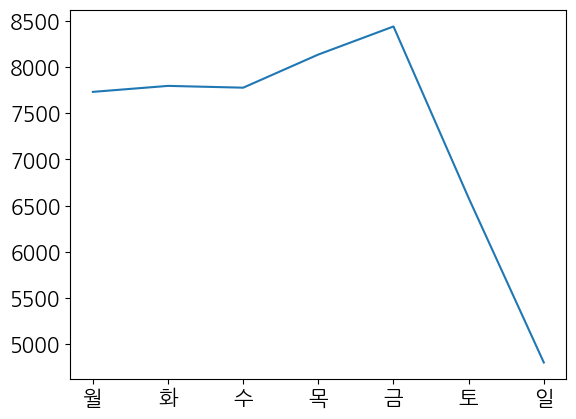

In [147]:
plt.plot(byweek.index, byweek)
plt.show()

In [148]:
byweek[0:-2]

요일
월    7730.420168
화    7795.171481
수    7775.731880
목    8134.519433
금    8438.043592
Name: 합계, dtype: float64

In [149]:
byweek[-2:]

요일
토    6581.676733
일    4801.948413
Name: 합계, dtype: float64

In [150]:
week[:-2]

['월', '화', '수', '목', '금']

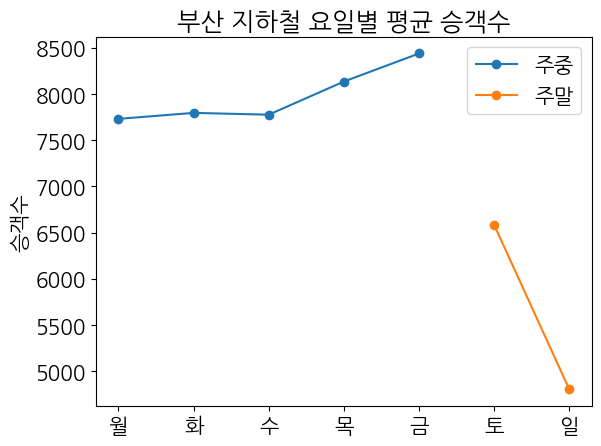

In [156]:
plt.plot(week[:-2], byweek[0:-2], marker='o', label = '주중')
plt.plot(week[-2:], byweek[-2:], marker='o', label = '주말')
plt.legend()
plt.title('부산 지하철 요일별 평균 승객수')
plt.ylabel('승객수')
plt.show()